<a href="https://colab.research.google.com/github/rubel-ds-ai/KaggleCodes/blob/main/Titanic_Kaggle_Starter_EDA_to_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. That's why the name DieTanic. This is a very unforgetable disaster that no one in the world can forget.

It took about $7.5 million to build the Titanic and it sunk under the ocean due to collision. The Titanic Dataset is a very good dataset for begineers to start a journey in data science and participate in competitions in Kaggle.

The Objective of this notebook is to give an idea how is the workflow in any predictive modeling problem. How do we check features, how do we add new features and some Machine Learning Concepts. I have tried to keep the notebook as basic as possible so that even newbies can understand every phase of it.

#**Contents of the Notebook:**
**Part1:** Exploratory Data Analysis(EDA):
1)Analysis of the features.

2)Finding any relations or trends considering multiple features.

**Part2:** Feature Engineering and Data Cleaning:
1)Adding any few features.

2)Removing redundant features.

3)Converting features into suitable form for modeling.

**Part3:** Predictive Modeling
1)Running Basic Algorithms.

2)Cross Validation.

3)Ensembling.

4)Important Features Extraction.

In [ ]:

# Imports
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Config
pd.set_option('display.max_columns', 100)

# Path to data (change if needed)
# DATA_PATH = "."  # e.g., "./data" if you store files in a subfolder
# train_path = f"{DATA_PATH}/train.csv"
# test_path = f"{DATA_PATH}/test.csv"


## 1) Load data

In [ ]:

# train = pd.read_csv(train_path)
# test  = pd.read_csv(test_path)

# print(train.shape, test.shape)
# train.head()


# from google.colab import files
# import io
# import pandas as pd

# uploaded_train = files.upload()

# # Take the first (or only) uploaded file
# filename = next(iter(uploaded))

# train = pd.read_csv(io.BytesIO(uploaded[filename])) # pl upload train.csv here

# # print(f"Loaded file: {filename}")
# # df.head()


In [ ]:
# uploaded_test = files.upload()

# test = pd.read_csv(io.BytesIO(uploaded[filename]))  # pl upload test.csv here


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Example: if your CSVs are in My Drive/Kaggle/Titanic/
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/DataSets/Kaggle/Titanic/train.csv')
test  = pd.read_csv('/content/drive/MyDrive/DataSets/Kaggle/Titanic/test.csv')

print(train.shape, test.shape)
train.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(891, 12) (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 2) Exploratory Data Analysis(EDA)


https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic

In [ ]:

train.isnull().sum() #checking for total null values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


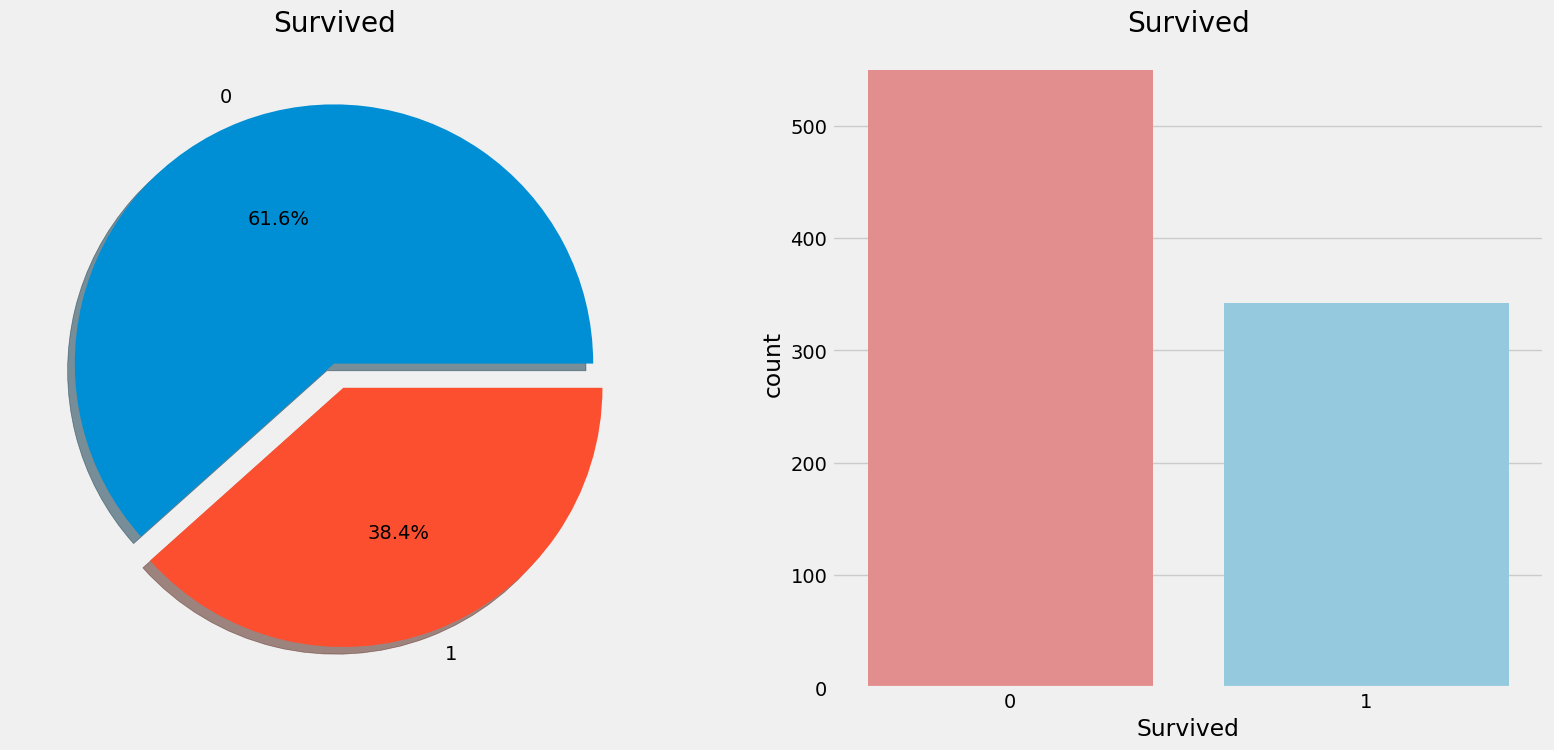

In [ ]:
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Create a figure with 1 row and 2 columns of subplots
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart of survival counts
train['Survived'].value_counts().plot.pie(
    explode=[0, 0.1],            # Offset the second slice (usually survived=1)
    autopct='%1.1f%%',           # Show percentages with 1 decimal
    ax=ax[0],                    # Left subplot
    shadow=True                  # Adds shadow for better visual
)
ax[0].set_title('Survived')
ax[0].set_ylabel('')             # Removes default y-label (which would say "count")

# Bar plot of survival counts
# sns.countplot(x='Survived', data=train, ax=ax[1])
sns.countplot(x='Survived', data=train, ax=ax[1], palette={'0': 'lightcoral', '1': 'skyblue'})
ax[1].set_title('Survived')

# Display both plots
plt.show()


In [ ]:
train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

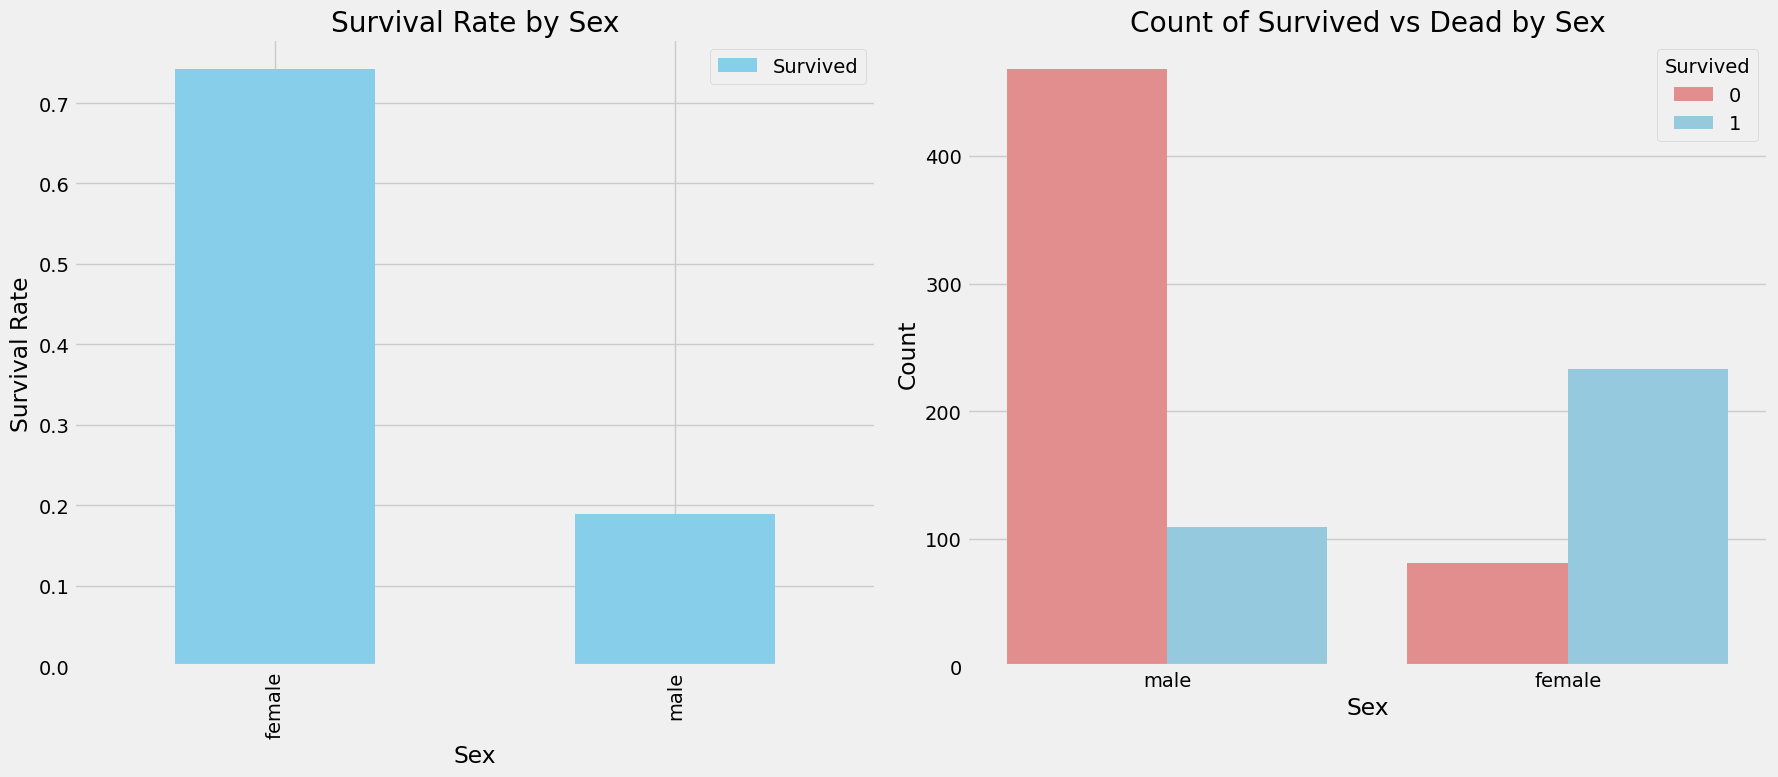

In [ ]:
# Create 1x2 subplots
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Bar plot of survival rate by Sex
train[['Sex', 'Survived']].groupby('Sex').mean().plot.bar(ax=ax[0], color=['skyblue'])
ax[0].set_title('Survival Rate by Sex')
ax[0].set_ylabel('Survival Rate')
ax[0].set_xlabel('Sex')

# Count plot of total survivors and non-survivors by Sex
sns.countplot(x='Sex', hue='Survived', data=train, ax=ax[1], palette={0: 'lightcoral', 1: 'skyblue'})
ax[1].set_title('Count of Survived vs Dead by Sex')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Sex')

plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(train.Pclass,train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [ ]:
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

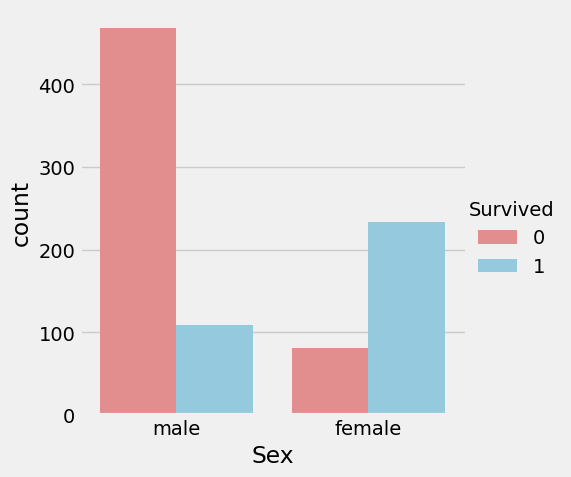

In [ ]:
sns.catplot(x='Sex', hue='Survived', data=train, kind='count', palette={0: 'lightcoral', 1: 'skyblue'})


In [ ]:
print('Oldest Passenger was of:',train['Age'].max(),'Years')
print('Youngest Passenger was of:',train['Age'].min(),'Years')
print('Average Age on the ship:',train['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


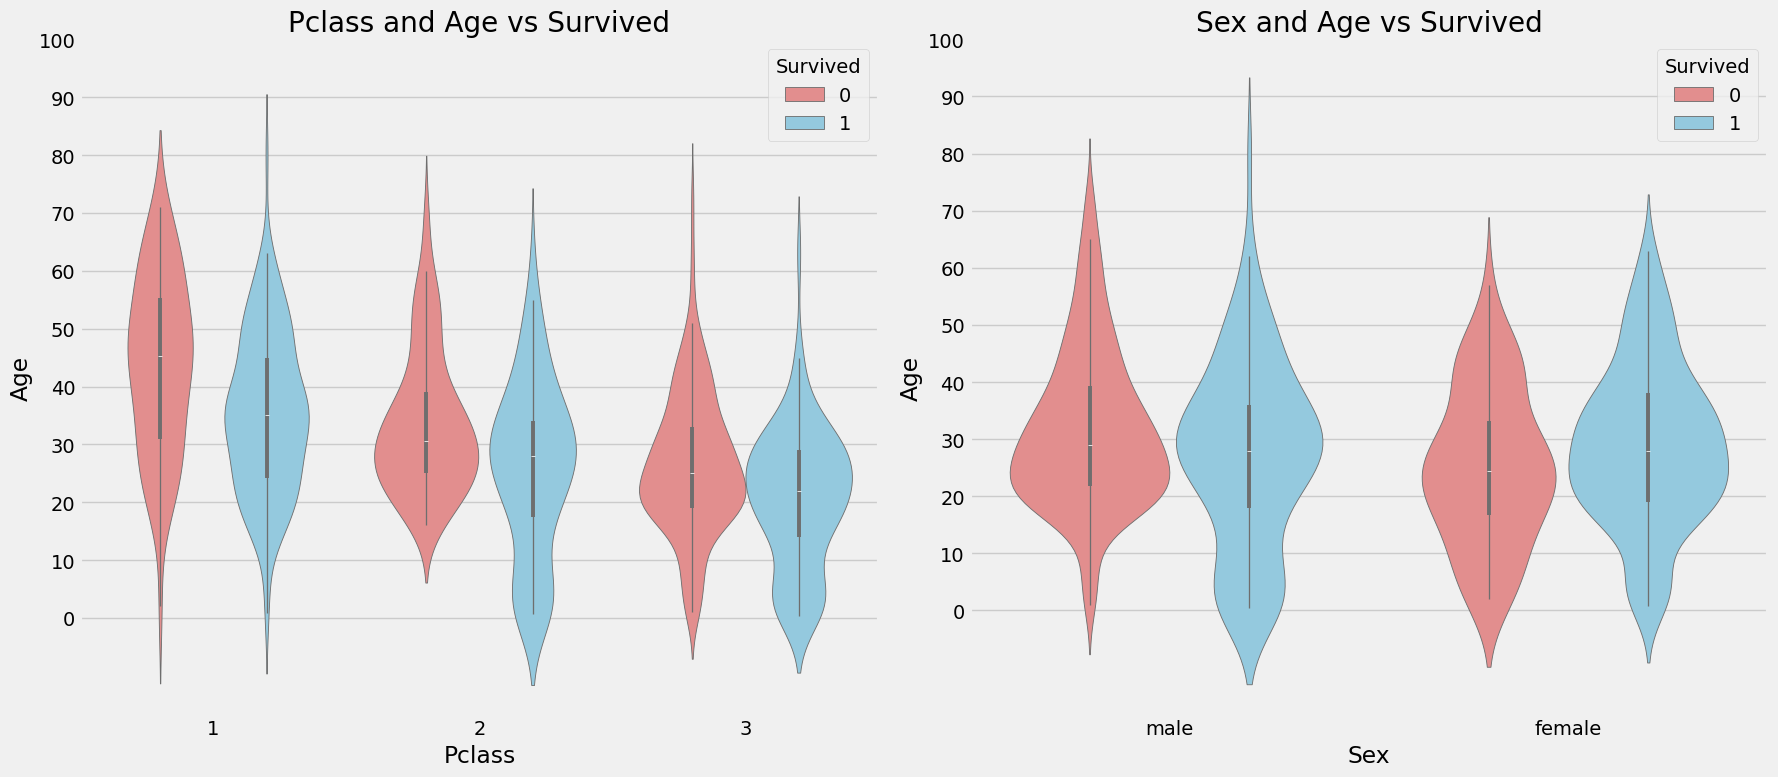

In [ ]:
# Create subplots
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Left: Pclass vs Age (hue = Survived)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, ax=ax[0], palette={0: 'lightcoral', 1: 'skyblue'})
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

# Right: Sex vs Age (hue = Survived)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train, ax=ax[1], palette={0: 'lightcoral', 1: 'skyblue'})
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.tight_layout()
plt.show()

In [ ]:
train['Initial']=0
for i in train:
    train['Initial']=train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [ ]:
train['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [ ]:
pd.crosstab(train.Initial,train.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                         ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
pd.crosstab(train.Initial,train.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


In [ ]:
train.groupby('Initial')['Age'].mean() #lets check the average age by Initials

,Age
Initial,
Master,4.574167
Miss,21.860000
Mr,32.739609
Mrs,35.981818
Other,45.888889


In [ ]:
# Fill missing Age values based on Initials (titles)
train.loc[(train.Age.isnull()) & (train.Initial == 'Mr'), 'Age'] = 33
train.loc[(train.Age.isnull()) & (train.Initial == 'Mrs'), 'Age'] = 36
train.loc[(train.Age.isnull()) & (train.Initial == 'Master'), 'Age'] = 5
train.loc[(train.Age.isnull()) & (train.Initial == 'Miss'), 'Age'] = 22
train.loc[(train.Age.isnull()) & (train.Initial == 'Other'), 'Age'] = 46

In [ ]:
train.Age.isnull().any() #So no null values left finally


np.False_

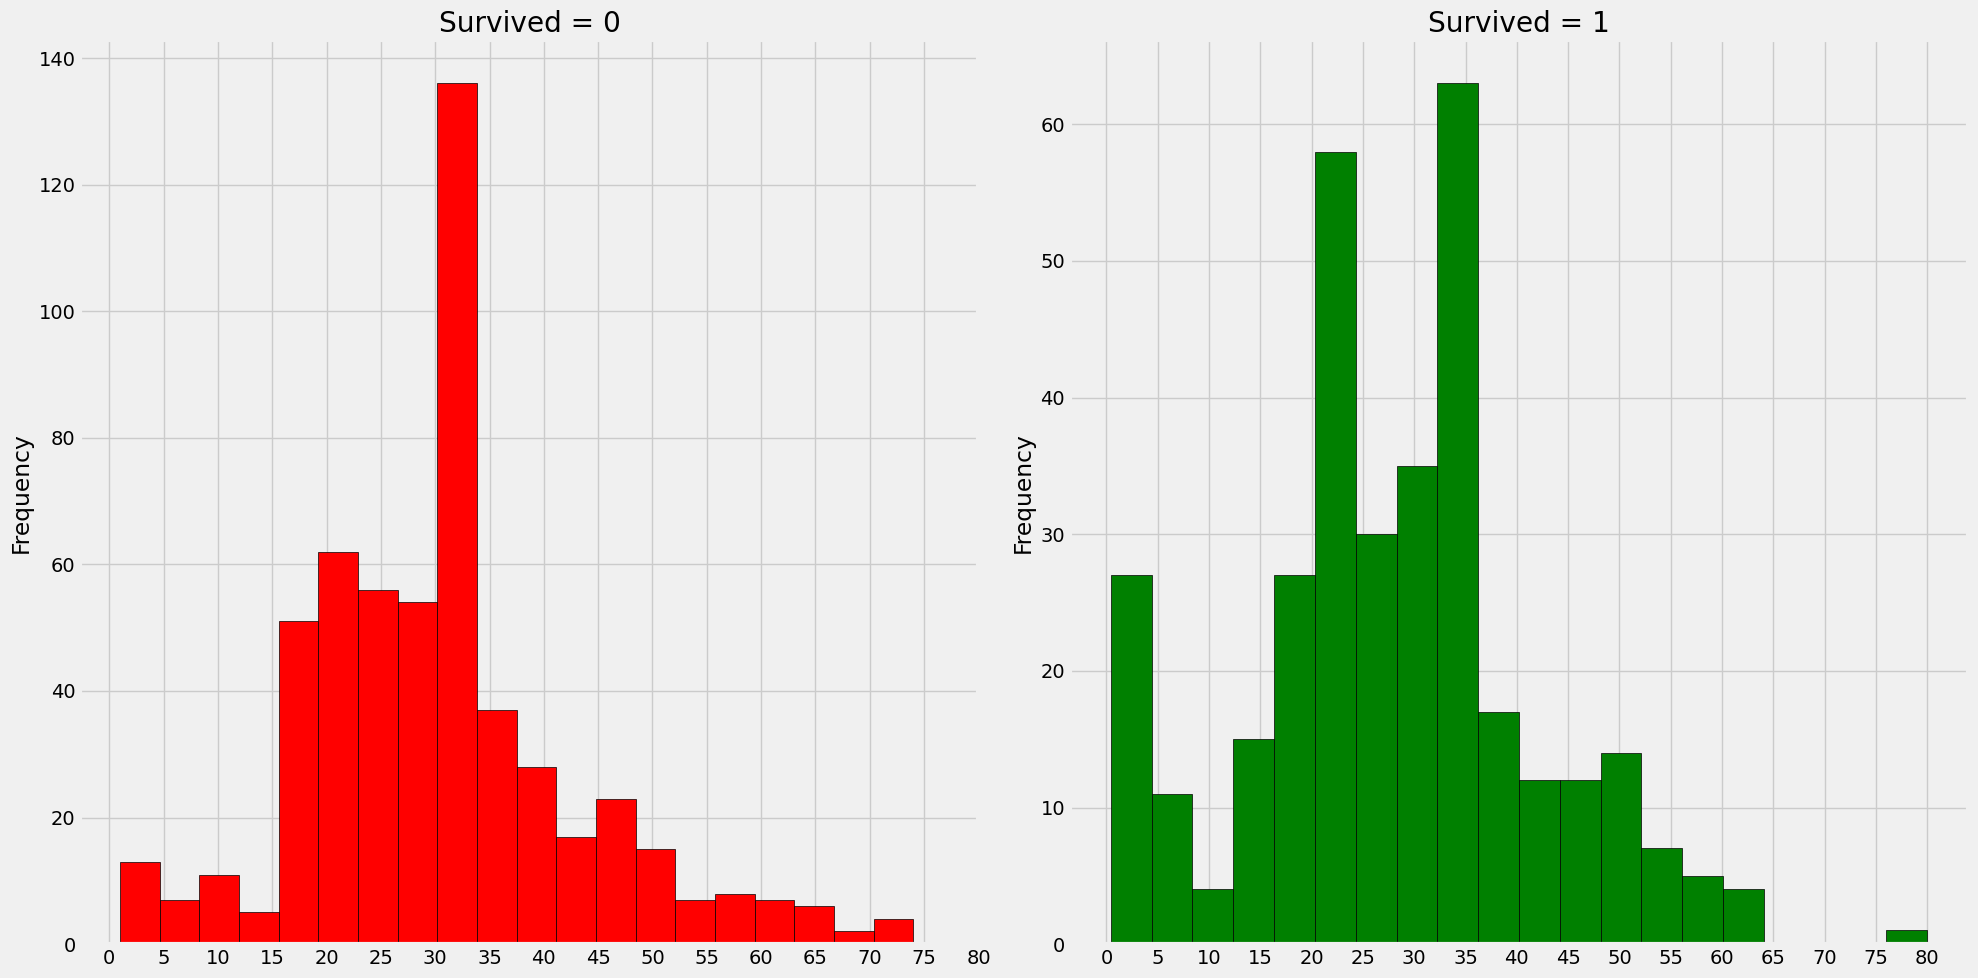

In [ ]:
# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Histogram for passengers who did NOT survive
train[train['Survived'] == 0]['Age'].plot.hist(
    ax=ax[0],
    bins=20,
    edgecolor='black',
    color='red'
)
ax[0].set_title('Survived = 0')
ax[0].set_xticks(list(range(0, 85, 5)))

# Histogram for passengers who DID survive
train[train['Survived'] == 1]['Age'].plot.hist(
    ax=ax[1],
    bins=20,
    edgecolor='black',
    color='green'
)
ax[1].set_title('Survived = 1')
ax[1].set_xticks(list(range(0, 85, 5)))

plt.tight_layout()
plt.show()

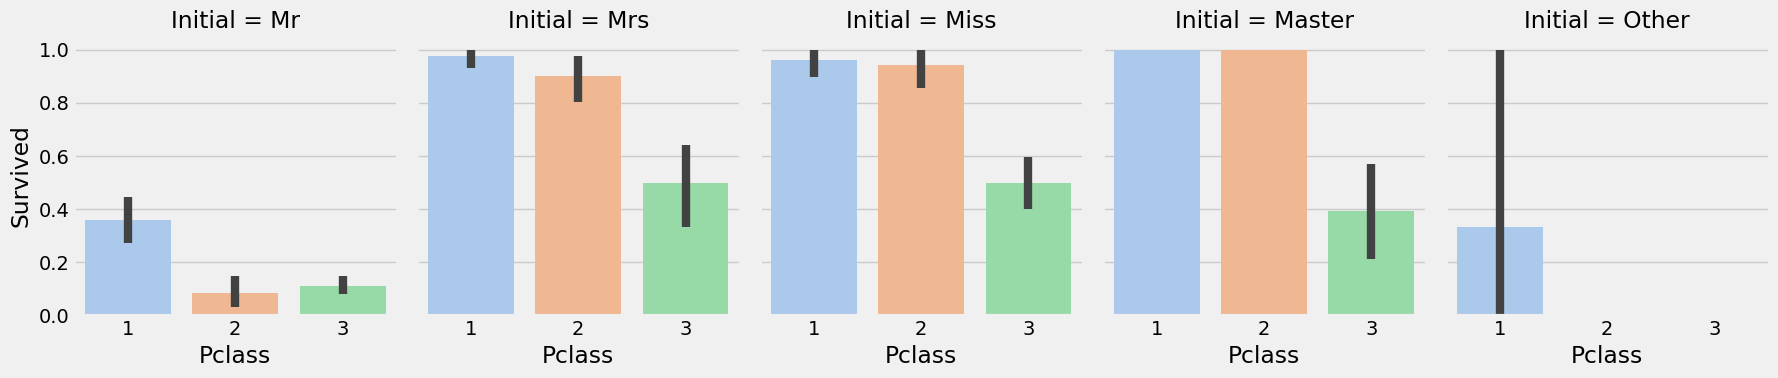

In [ ]:
sns.catplot(
    x='Pclass',         # x-axis
    y='Survived',       # y-axis (will show average survival rate)
    col='Initial',      # create a subplot for each title (Initial)
    data=train,         # dataset
    kind='bar',         # bar plot for mean survival rate
    height=4,           # height of each subplot
    aspect=0.9,         # aspect ratio (width/height)
    palette='pastel'    # optional color style
)

plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab([train.Embarked,train.Pclass],[train.Sex,train.Survived],margins=True).style.background_gradient(cmap='summer_r')

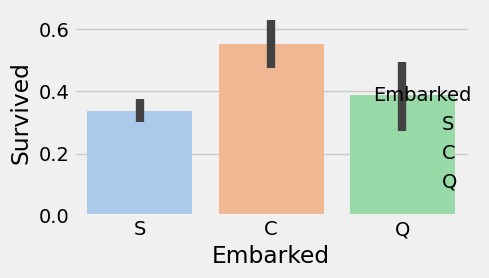

In [ ]:
# Use catplot to replace factorplot
g = sns.catplot(
    x='Embarked',
    y='Survived',
    data=train,
    kind='bar',
    palette='pastel'
)

# Set figure size
g.fig.set_size_inches(5, 3)

plt.tight_layout()
plt.show()

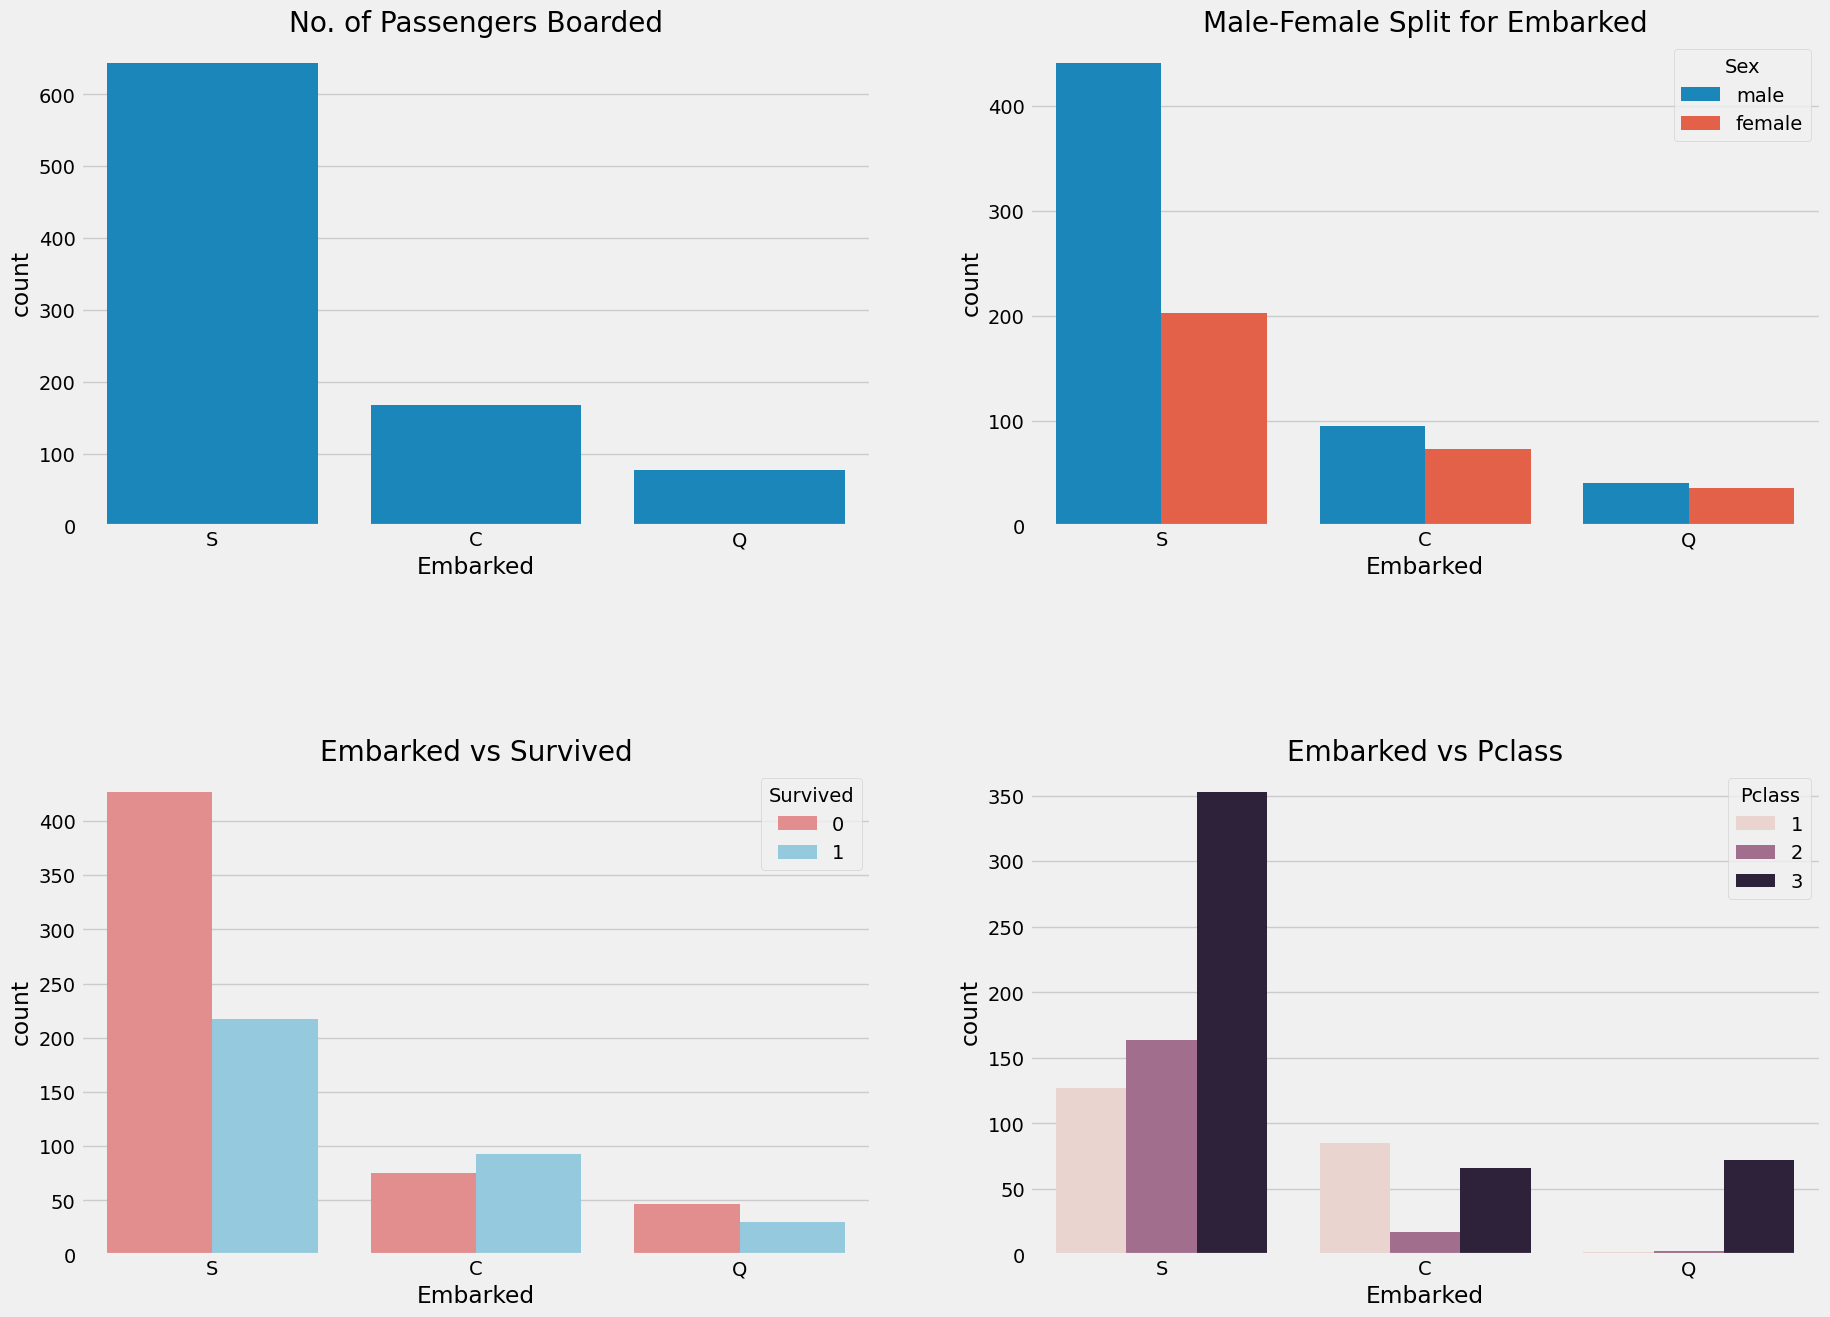

In [ ]:
# Create 2x2 subplots
f, ax = plt.subplots(2, 2, figsize=(20, 15))

# Top-left: Count of passengers per embarkation point
sns.countplot(x='Embarked', data=train, ax=ax[0, 0])
ax[0, 0].set_title('No. of Passengers Boarded')

# Top-right: Embarked vs Sex
sns.countplot(x='Embarked', hue='Sex', data=train, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')

# Bottom-left: Embarked vs Survived
sns.countplot(x='Embarked', hue='Survived', data=train, ax=ax[1, 0], palette={0: 'lightcoral', 1: 'skyblue'})
ax[1, 0].set_title('Embarked vs Survived')

# Bottom-right: Embarked vs Pclass
sns.countplot(x='Embarked', hue='Pclass', data=train, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

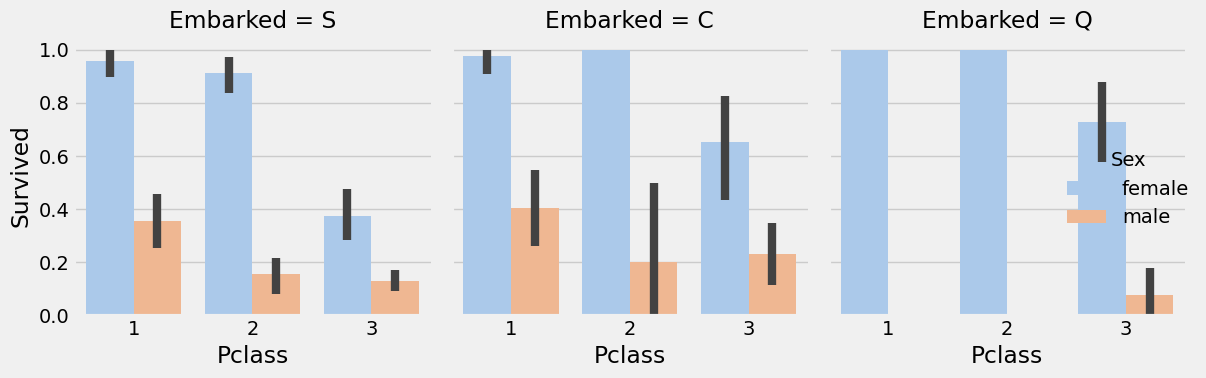

In [ ]:
sns.catplot(
    x='Pclass',
    y='Survived',
    hue='Sex',
    col='Embarked',
    data=train,
    kind='bar',         # bar chart of mean survival rate
    height=4,
    aspect=0.9,
    palette='pastel'
)

plt.tight_layout()
plt.show()

In [ ]:
train['Embarked'].fillna('S',inplace=True)
train.Embarked.isnull().any()# Finally No NaN values


np.False_

In [ ]:
pd.crosstab([train.SibSp],train.Survived).style.background_gradient(cmap='summer_r')


Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


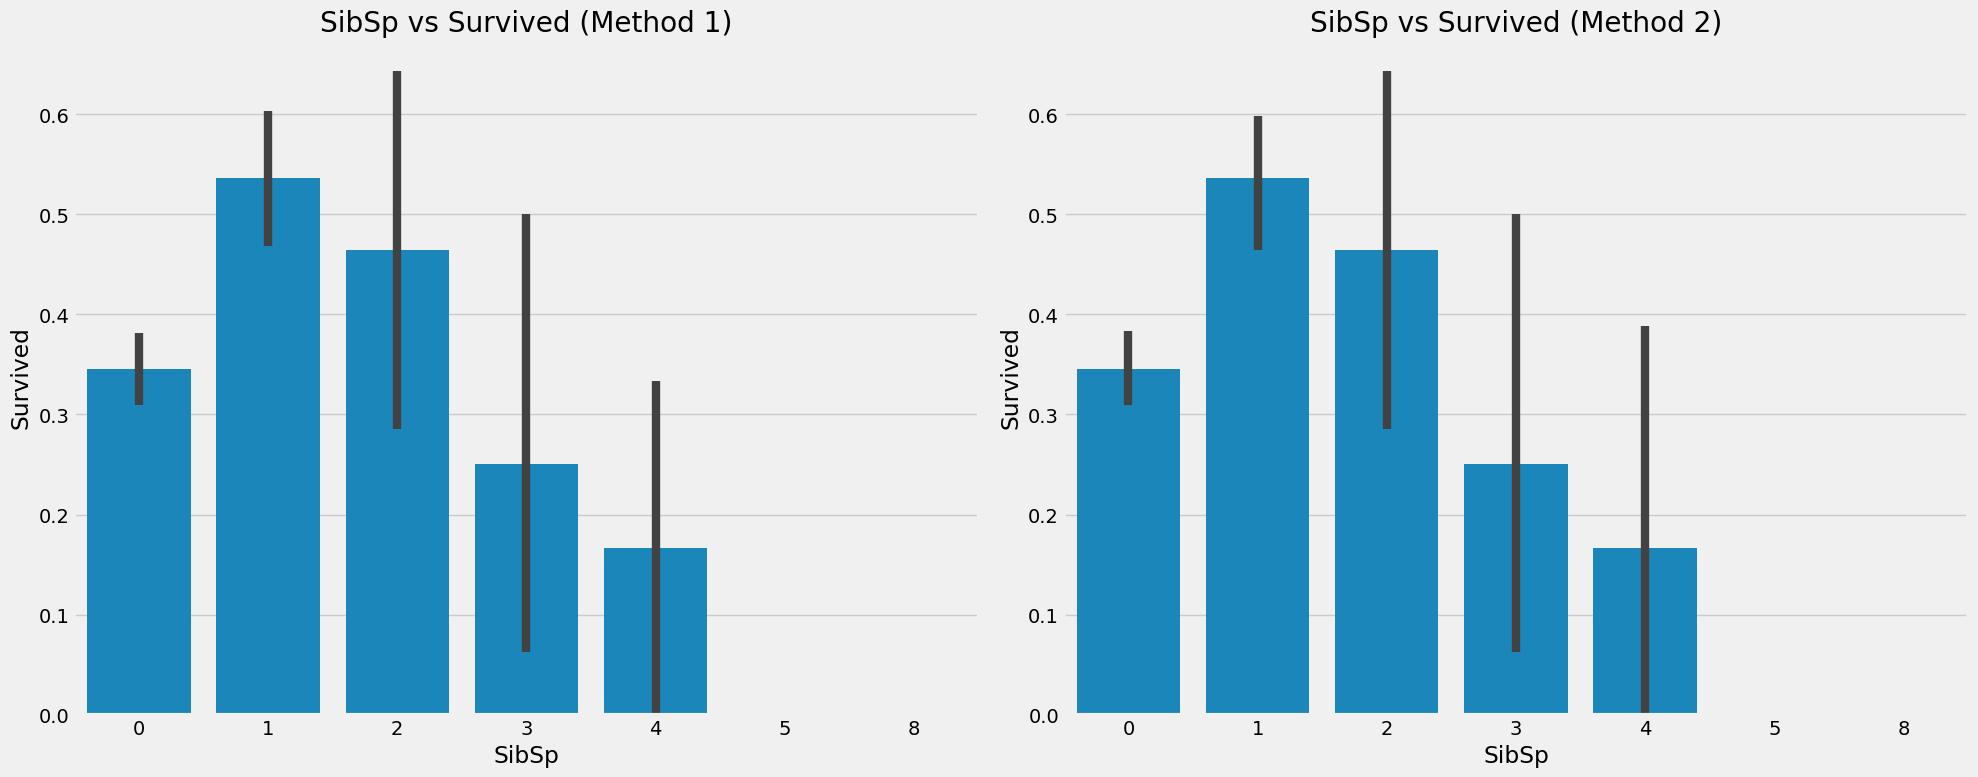

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Left: Barplot using ax[0]
sns.barplot(x='SibSp', y='Survived', data=train, ax=ax[0])
ax[0].set_title('SibSp vs Survived (Method 1)')

# Right: Another barplot using ax[1]
sns.barplot(x='SibSp', y='Survived', data=train, ax=ax[1])
ax[1].set_title('SibSp vs Survived (Method 2)')

plt.tight_layout()
plt.show()



In [ ]:
pd.crosstab(train.SibSp,train.Pclass).style.background_gradient(cmap='summer_r')


Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [ ]:
pd.crosstab(train.Parch,train.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


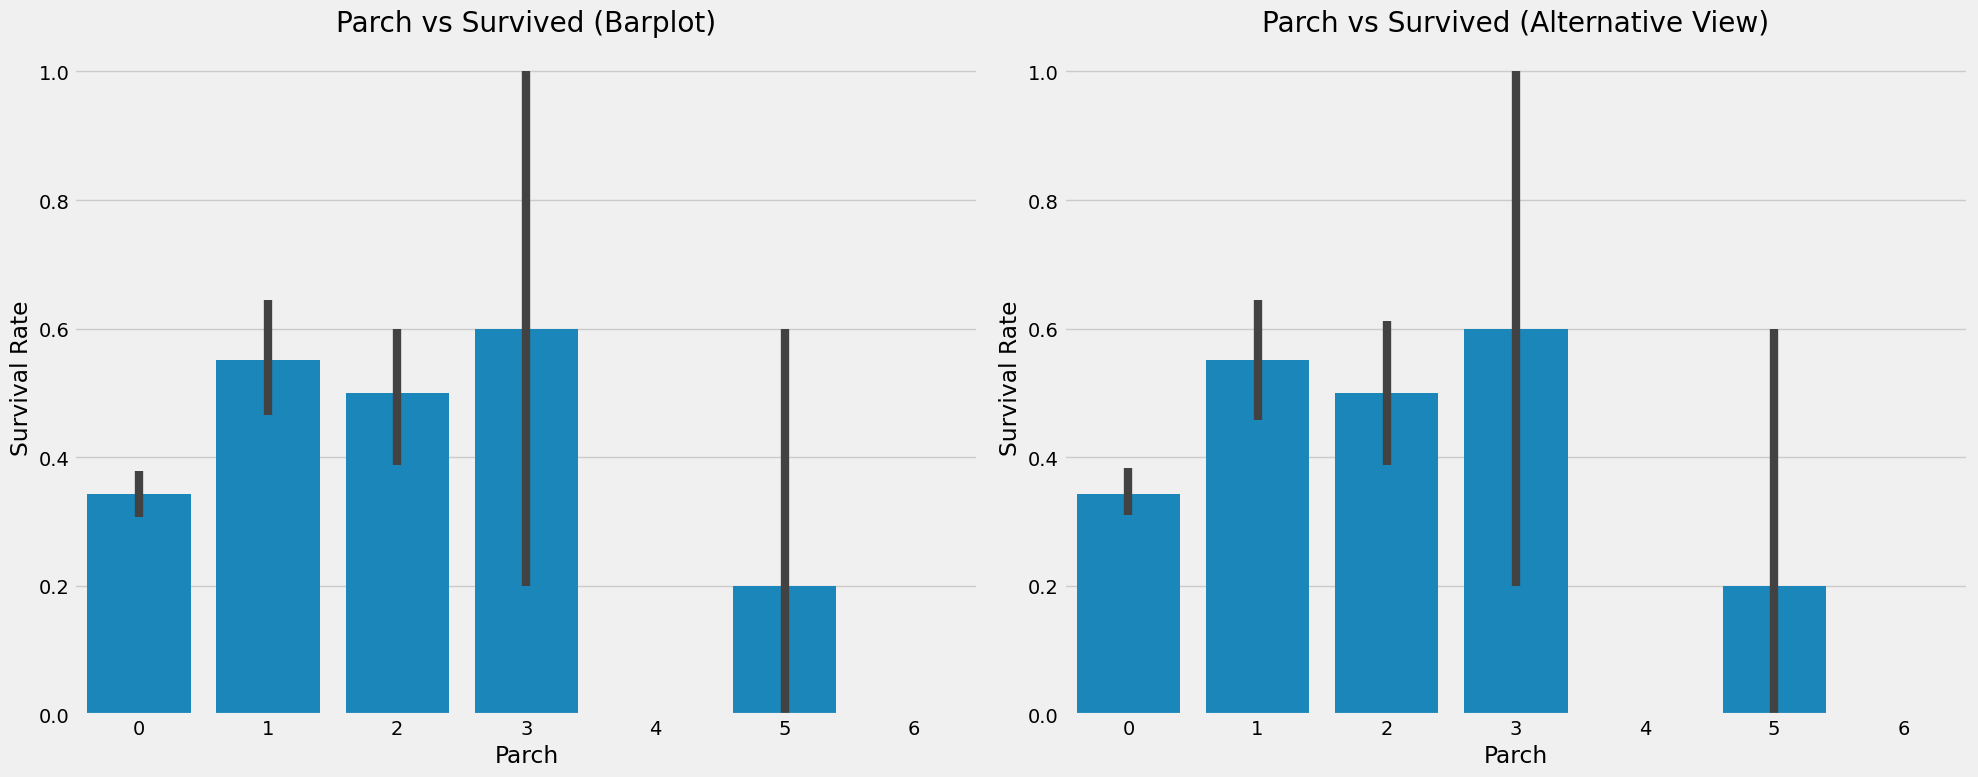

In [ ]:

# Create 1x2 subplot
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# First subplot: barplot of Parch vs Survived
sns.barplot(x='Parch', y='Survived', data=train, ax=ax[0])
ax[0].set_title('Parch vs Survived (Barplot)')
ax[0].set_xlabel('Parch')
ax[0].set_ylabel('Survival Rate')

# Second subplot: use another barplot (factorplot no longer works)
sns.barplot(x='Parch', y='Survived', data=train, ax=ax[1])
ax[1].set_title('Parch vs Survived (Alternative View)')
ax[1].set_xlabel('Parch')
ax[1].set_ylabel('Survival Rate')

plt.tight_layout()
plt.show()

In [ ]:
train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [ ]:
train[train['Parch'] == 6]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S,Mrs


In [ ]:
print('Highest Fare was:',train['Fare'].max())
print('Lowest Fare was:',train['Fare'].min())
print('Average Fare was:',train['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


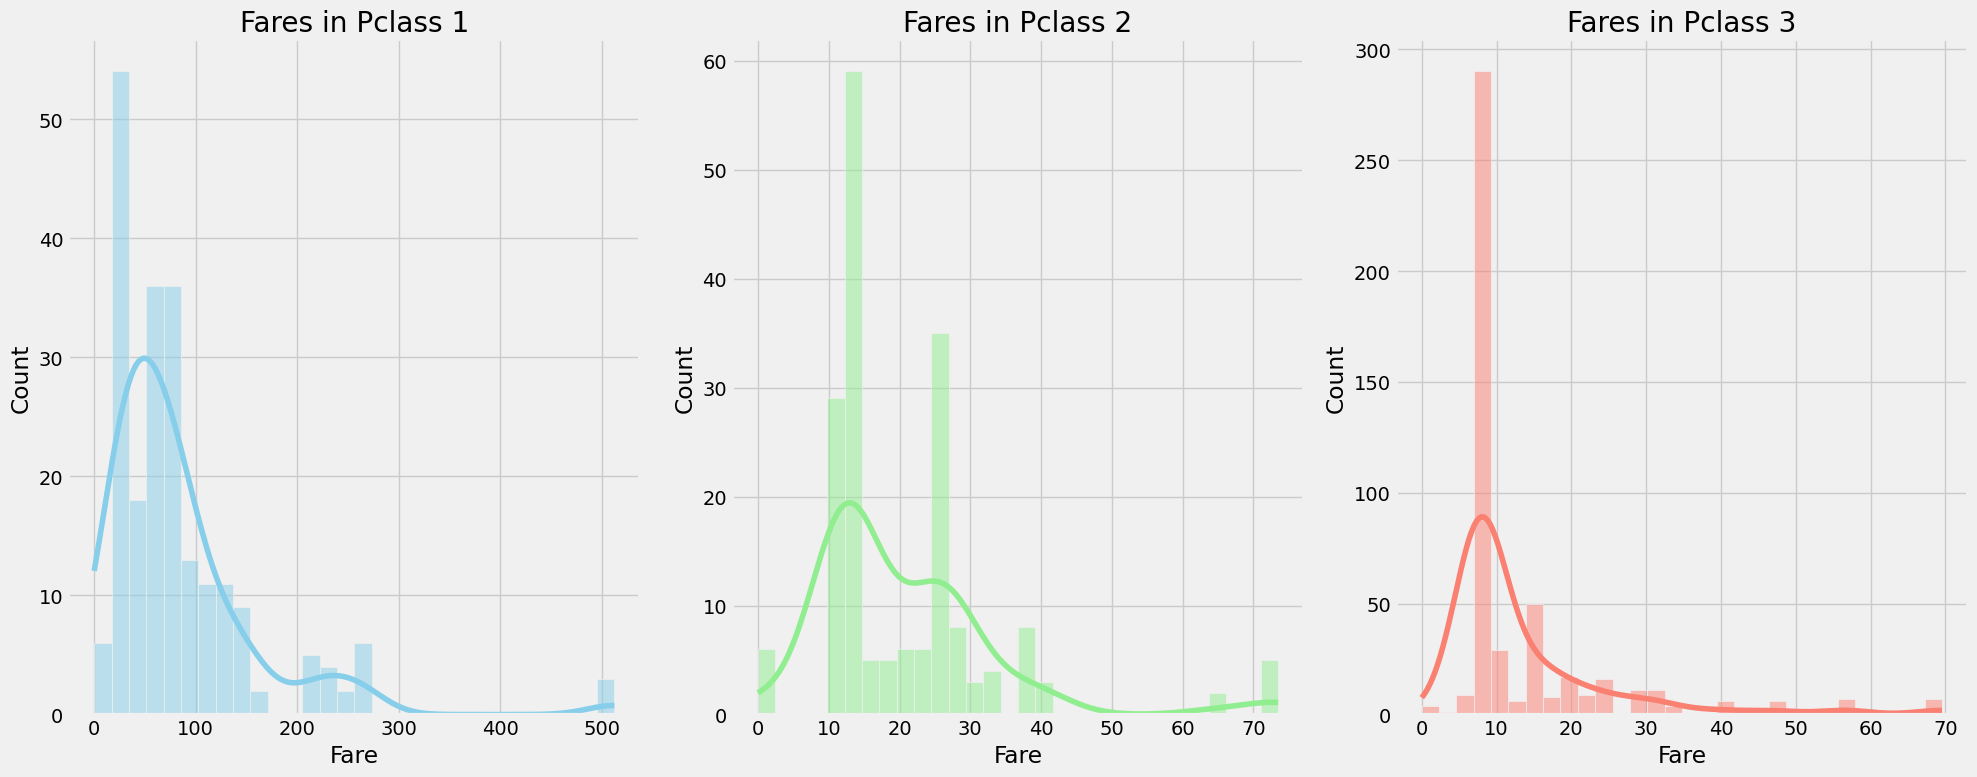

In [ ]:
# Create subplots
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Pclass 1
sns.histplot(data=train[train['Pclass'] == 1], x='Fare', kde=True, bins=30, ax=ax[0], color='skyblue')
ax[0].set_title('Fares in Pclass 1')

# Pclass 2
sns.histplot(data=train[train['Pclass'] == 2], x='Fare', kde=True, bins=30, ax=ax[1], color='lightgreen')
ax[1].set_title('Fares in Pclass 2')

# Pclass 3
sns.histplot(data=train[train['Pclass'] == 3], x='Fare', kde=True, bins=30, ax=ax[2], color='salmon')
ax[2].set_title('Fares in Pclass 3')

plt.tight_layout()
plt.show()

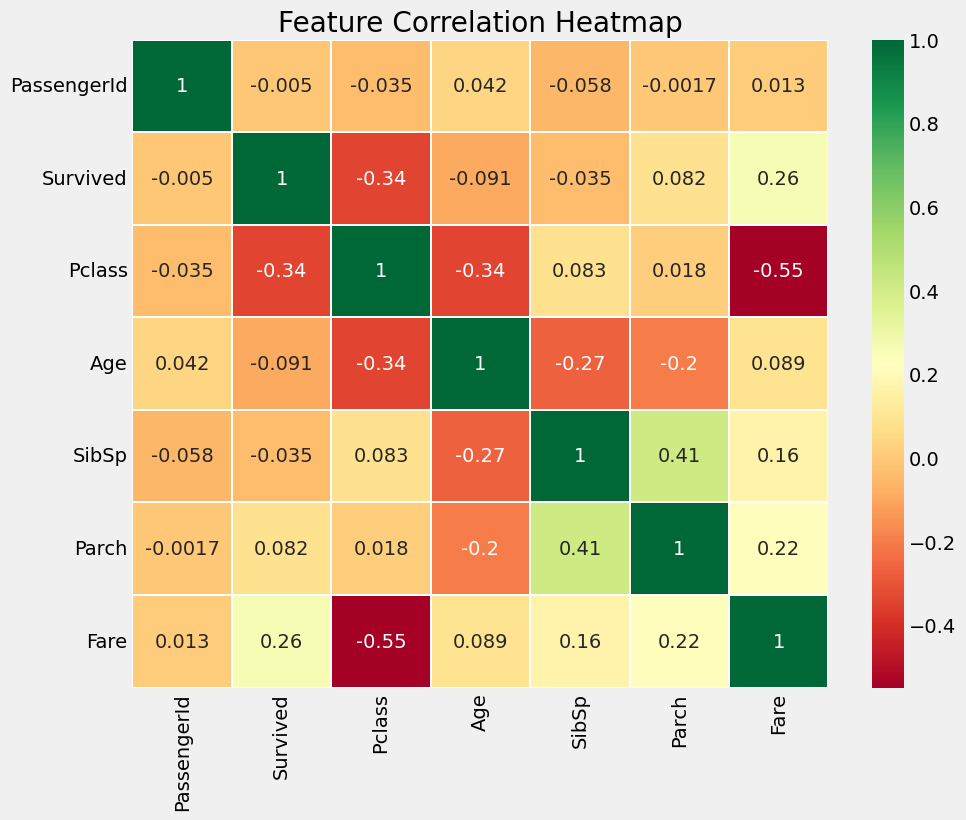

In [ ]:
# Generate heatmap of the correlation matrix
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='RdYlGn', linewidths=0.2)

# Set figure size
fig = plt.gcf()
fig.set_size_inches(10, 8)

plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [ ]:

# # Target balance
# print(train['Survived'].value_counts(normalize=True).rename('share').round(3))

# # Missing values overview
# missing = train.isna().mean().sort_values(ascending=False)
# print("\nMissing (train):\n", missing[missing > 0])

# # Simple visualizations (matplotlib only — no seaborn)
# # Survival by Sex
# fig = plt.figure()
# (train.groupby('Sex')['Survived'].mean()*100).plot(kind='bar')
# plt.ylabel('Survival rate (%)')
# plt.title('Survival rate by Sex')
# plt.show()

# # Survival by Pclass
# fig = plt.figure()
# (train.groupby('Pclass')['Survived'].mean()*100).plot(kind='bar')
# plt.ylabel('Survival rate (%)')
# plt.title('Survival rate by Pclass')
# plt.show()


## 3) Feature Engineering and Data Cleaning

In [ ]:

# def extract_title(name: str) -> str:
#     """Extract passenger title from the Name field."""
#     m = re.search(r',\s*([^\.]+)\.', name)
#     title = m.group(1).strip() if m else 'None'
#     # Map rare titles
#     common = {'Mr','Mrs','Miss','Master'}
#     title = title.replace('Mlle','Miss').replace('Ms','Miss').replace('Mme','Mrs')
#     return title if title in common else 'Rare'

# def add_features(df: pd.DataFrame) -> pd.DataFrame:
#     out = df.copy()
#     # Title
#     out['Title'] = out['Name'].apply(extract_title)
#     # Family size
#     out['FamilySize'] = out['SibSp'] + out['Parch'] + 1
#     # Is alone
#     out['IsAlone'] = (out['FamilySize'] == 1).astype(int)
#     # Deck from Cabin (first letter), fill missing with 'U' for unknown
#     out['Deck'] = out['Cabin'].astype(str).str[0].replace('n', 'U')
#     # Ticket prefix (first letter/digit)
#     out['TicketPrefix'] = out['Ticket'].astype(str).str.replace(r'[^A-Za-z]', '', regex=True).str[:1].replace('', 'U')
#     return out

# train_fe = add_features(train)
# test_fe  = add_features(test)
# train_fe.head()


In [ ]:
train['Age_band'] = 0
train.loc[train['Age'] <= 16, 'Age_band'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age_band'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age_band'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age_band'] = 3
train.loc[train['Age'] > 64, 'Age_band'] = 4

# Display the first 2 rows
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [ ]:
train['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


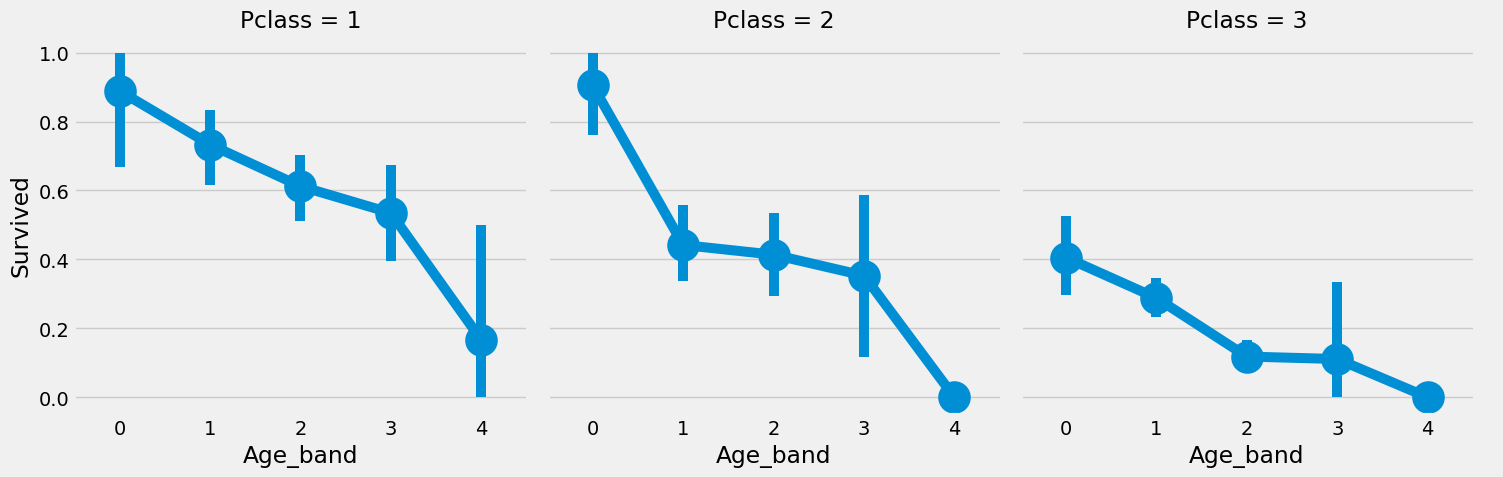

In [ ]:
sns.catplot(x='Age_band', y='Survived', data=train, col='Pclass', kind='point')
plt.show()


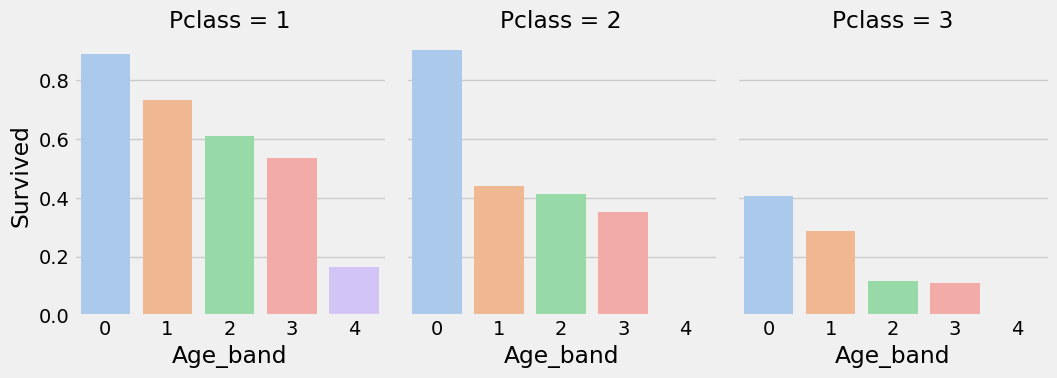

In [ ]:
sns.catplot(
    x='Age_band',
    y='Survived',
    data=train,
    col='Pclass',
    kind='bar',
    height=4,
    aspect=0.9,
    palette='pastel',
    ci=None
)

plt.tight_layout()
plt.show()

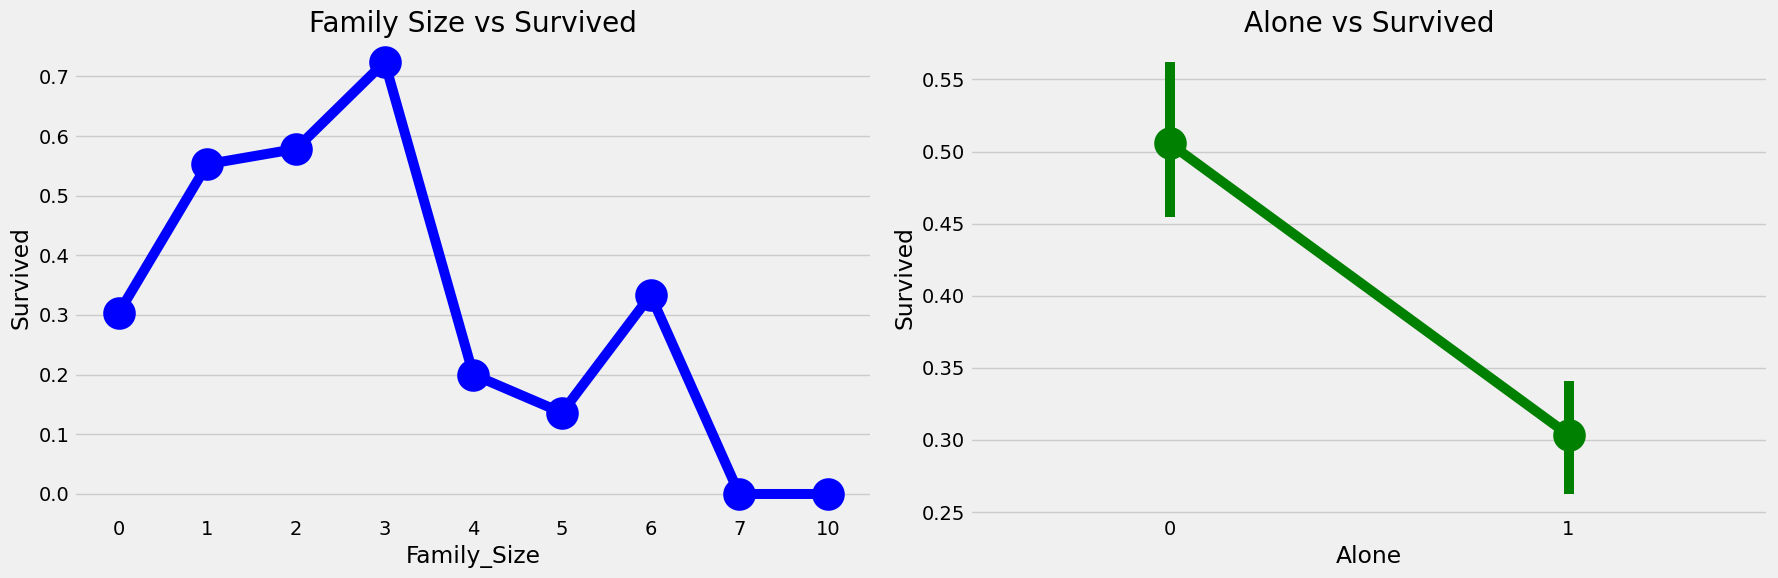

In [ ]:
# Create new features
train['Family_Size'] = train['Parch'] + train['SibSp']
train['Alone'] = 0
train.loc[train['Family_Size'] == 0, 'Alone'] = 1

# Plot
f, ax = plt.subplots(1, 2, figsize=(18, 6))

# Family Size vs Survived (pointplot instead of catplot)
sns.pointplot(x='Family_Size', y='Survived', data=train, ax=ax[0], color='blue', ci=None)
ax[0].set_title('Family Size vs Survived')

# Alone vs Survived
sns.pointplot(x='Alone', y='Survived', data=train, ax=ax[1], color='green')
ax[1].set_title('Alone vs Survived')

plt.tight_layout()
plt.show()


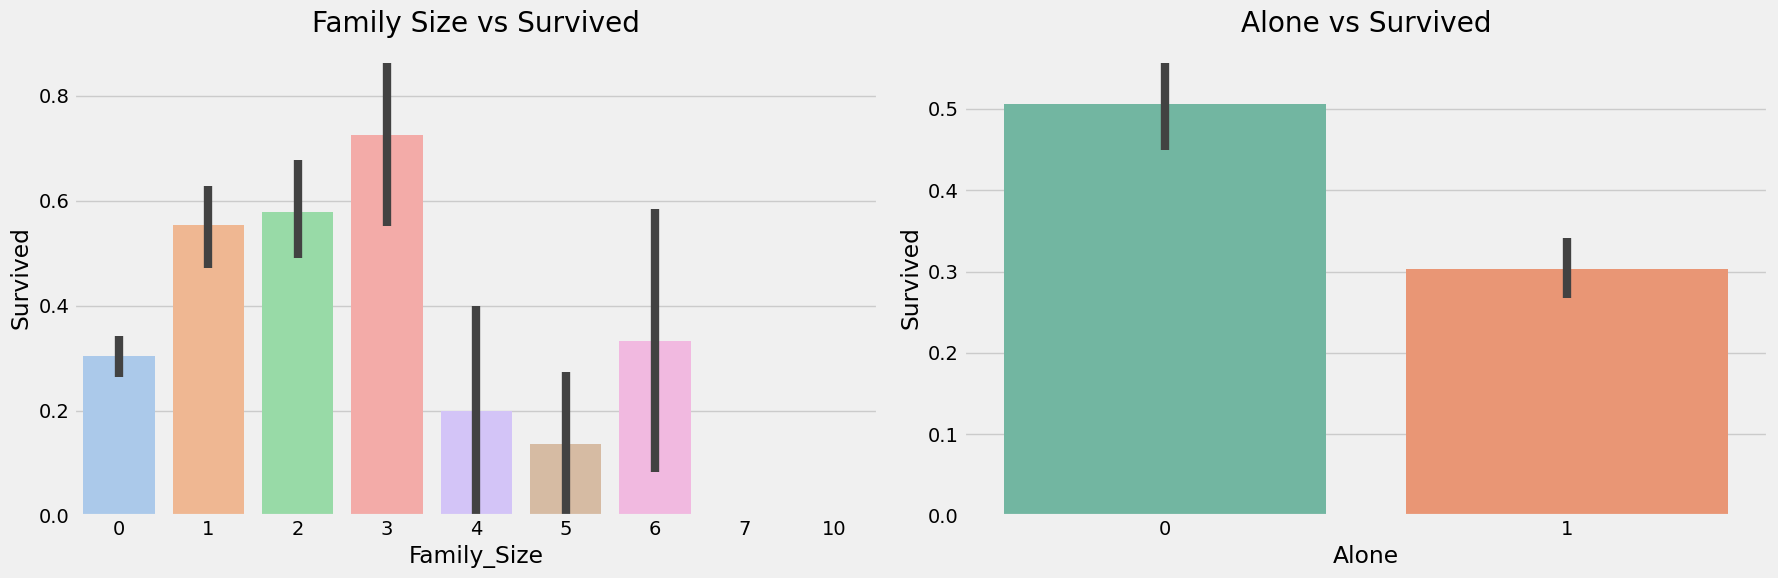

In [ ]:
# Create new features
train['Family_Size'] = train['Parch'] + train['SibSp']
train['Alone'] = 0
train.loc[train['Family_Size'] == 0, 'Alone'] = 1

# Plot
f, ax = plt.subplots(1, 2, figsize=(18, 6))

# Family Size vs Survived
sns.barplot(x='Family_Size', y='Survived', data=train, ax=ax[0], palette='pastel')
ax[0].set_title('Family Size vs Survived')

# Alone vs Survived
sns.barplot(x='Alone', y='Survived', data=train, ax=ax[1], palette='Set2')
ax[1].set_title('Alone vs Survived')

plt.tight_layout()
plt.show()

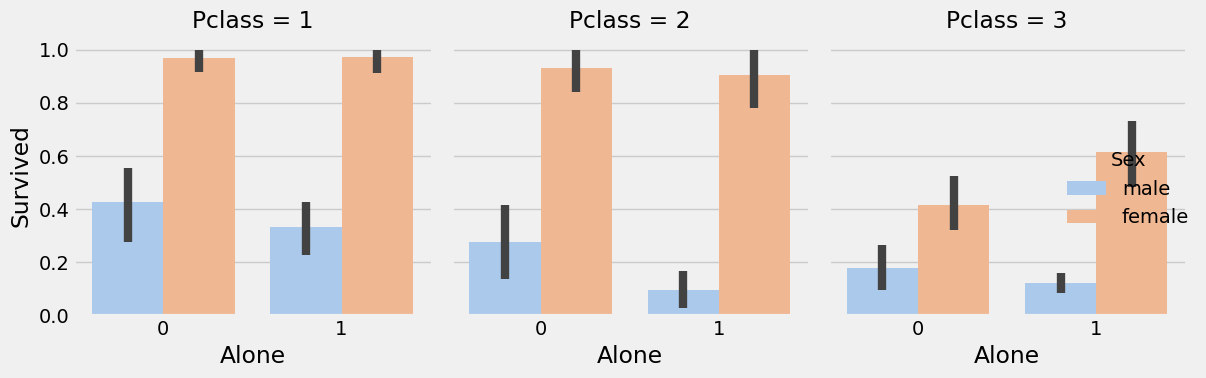

In [ ]:
sns.catplot(
    x='Alone',
    y='Survived',
    hue='Sex',
    col='Pclass',
    data=train,
    kind='bar',
    # kind='point',

    height=4,
    aspect=0.9,
    palette='pastel'
)

plt.tight_layout()
plt.show()

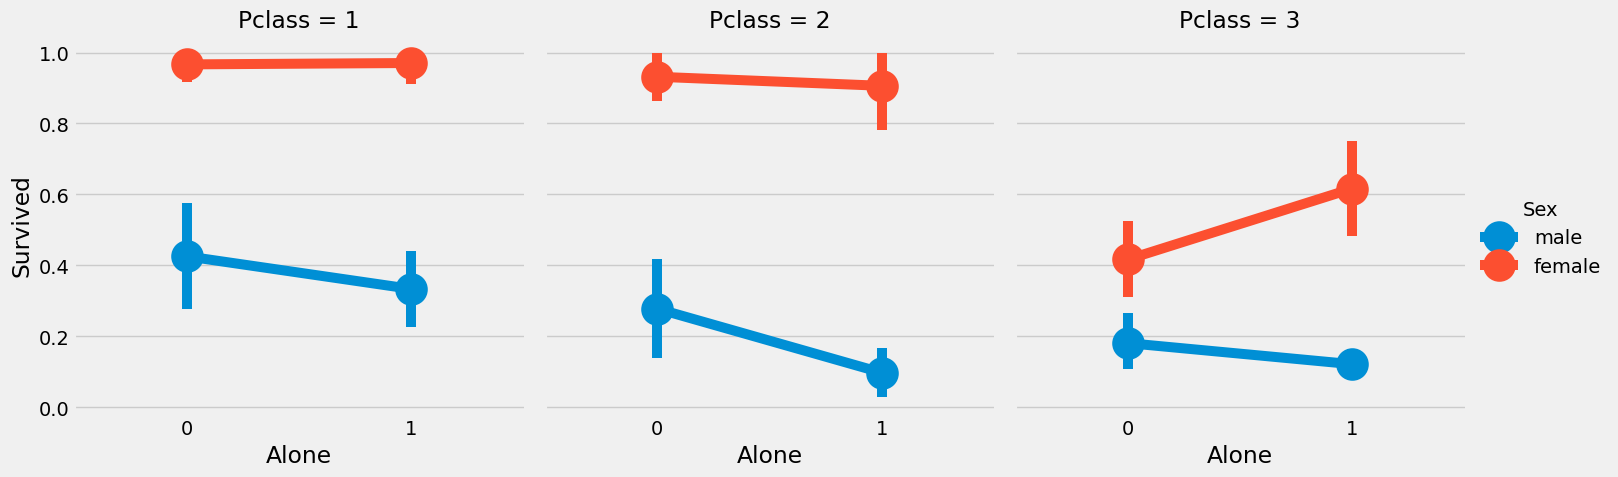

In [ ]:
sns.catplot(x='Alone', y='Survived', data=train, hue='Sex', col='Pclass', kind='point')
plt.show()

In [ ]:
train['Fare_Range']=pd.qcut(train['Fare'],4)
train.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [ ]:
print(train['Age'].isnull().any())

False


In [ ]:
train['Fare_Range'] = pd.qcut(train['Fare'], 4)

train.groupby(['Fare_Range'])['Survived']  \
     .mean() \
     .to_frame() \
     .style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [ ]:
# train.head()
train['Fare'].min()

0.0

In [ ]:
train['Fare_cat'] = 0
train.loc[train['Fare'] <= 7.91, 'Fare_cat'] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare_cat'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare_cat'] = 2
train.loc[(train['Fare'] > 31) & (train['Fare'] <= 513), 'Fare_cat'] = 3


In [ ]:
# train.head()

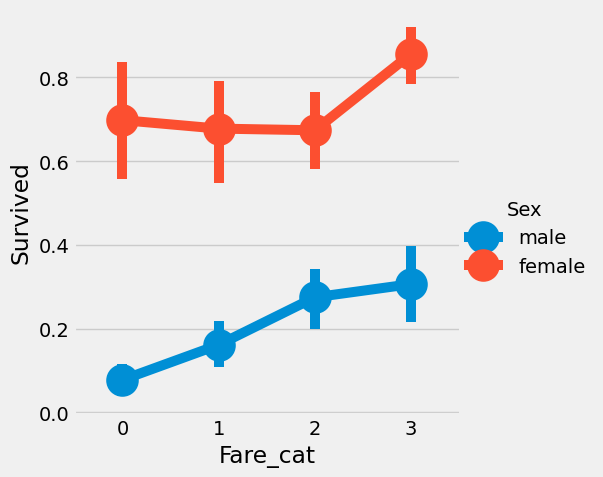

In [ ]:
sns.catplot(x='Fare_cat', y='Survived', data=train, hue='Sex', kind='point')
plt.show()


In [ ]:
print(train['Sex'].unique())
print(train['Embarked'].unique())
print(train['Initial'].unique())


['male' 'female']
['S' 'C' 'Q']
['Mr' 'Mrs' 'Miss' 'Master' 'Other']


In [ ]:
train['Sex'].replace(['male','female'],[0,1],inplace=True)
train['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
train['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)
print(train['Sex'].unique())
print(train['Embarked'].unique())
print(train['Initial'].unique())

[0 1]
[0 1 2]
[0 1 2 3 4]


In [ ]:
# train

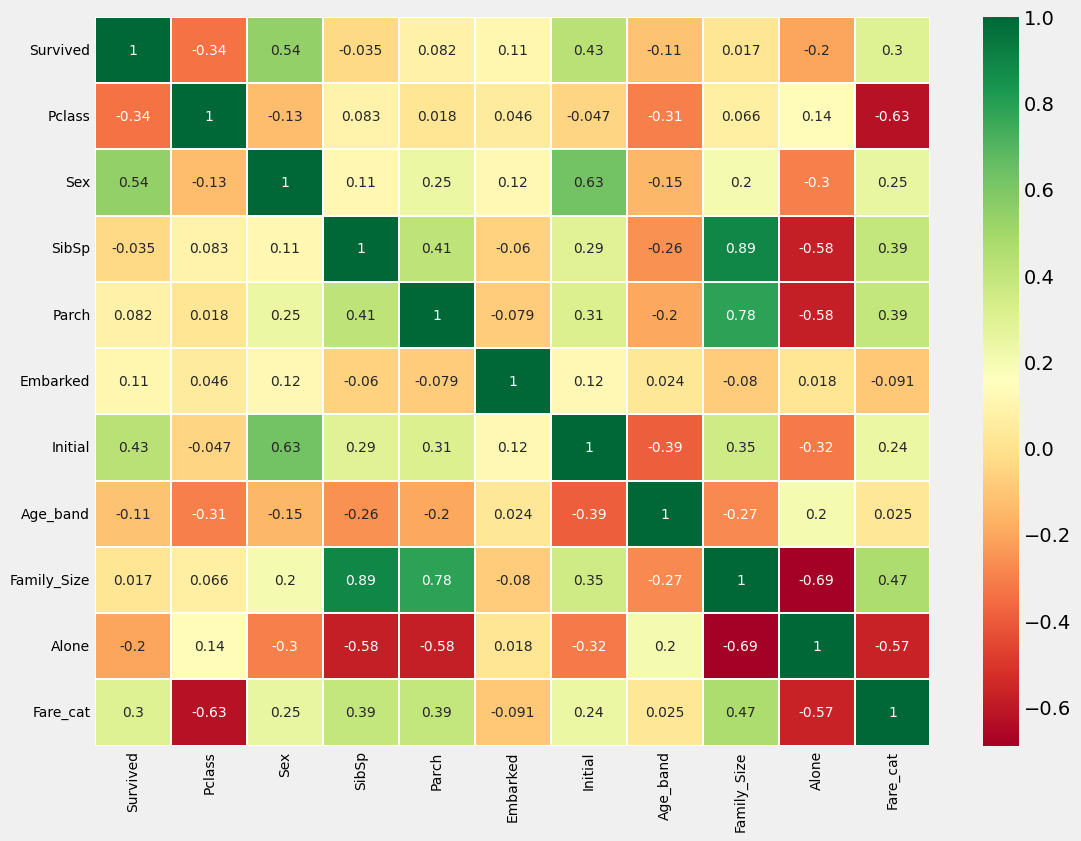

In [ ]:
 train.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(12,9)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## 4) Predictive Modeling

In [ ]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [ ]:
# Split the dataset into train and test sets (30% test) with stratification on 'Survived'
train_set, test_set = train_test_split(train, test_size=0.3, random_state=0, stratify=train['Survived'])

# Separate features and target for training
train_X = train_set.drop('Survived', axis=1)  # Features for training
train_Y = train_set['Survived']               # Target for training

# Separate features and target for testing
test_X = test_set.drop('Survived', axis=1)    # Features for testing
test_Y = test_set['Survived']                 # Target for testing

# Full dataset features and target (for reference or modeling)
X = train.drop('Survived', axis=1)           # All features
Y = train['Survived']                        # All targets

 **Radial Support Vector Machines(rbf-SVM)**


In [ ]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


**Linear Support Vector Machine(linear-SVM)**

In [ ]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


**Logistic Regression**

In [ ]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


**Decision Tree**

In [ ]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8022388059701493


**K-Nearest Neighbours(KNN)**

In [ ]:
model=KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8134328358208955


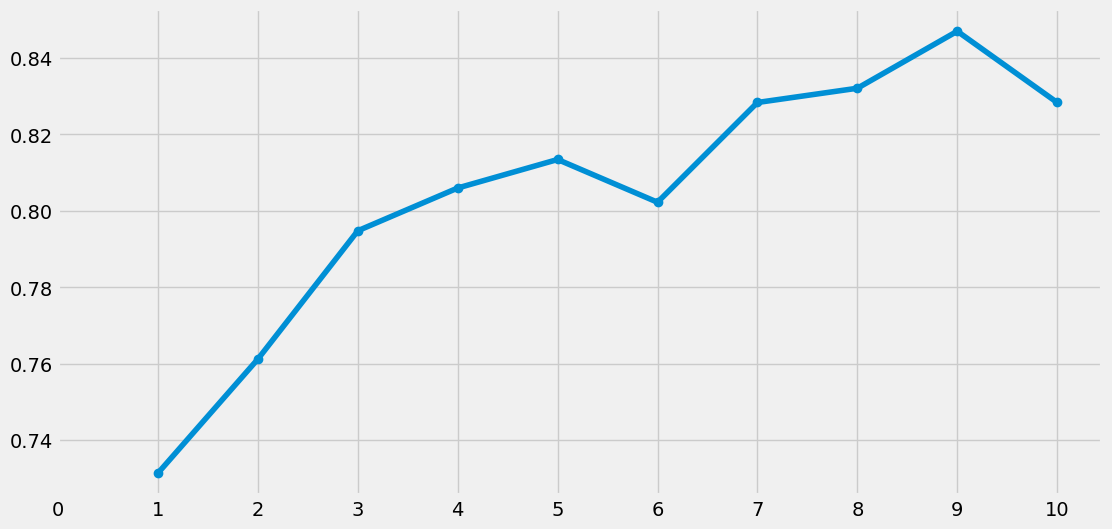

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as 0.8470149253731343


In [ ]:
a_index = list(range(1, 11))   # k values
accuracies = []                # store accuracy values

x = list(range(0, 11))         # xticks

for i in a_index:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    acc = metrics.accuracy_score(test_Y, prediction)
    accuracies.append(acc)

# Convert to Series
a = pd.Series(accuracies)

# Plot
plt.plot(a_index, a, marker='o')
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

print("Accuracies for different values of n are:", a.values,
      "with the max value as", a.values.max())

**Gaussian Naive Bayes**

In [ ]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


**Random Forests**

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8208955223880597


In [ ]:
# train.shape

# **Cross Validation**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# K-Fold setup (10 folds, shuffle ensures randomness)
kfold = KFold(n_splits=10, shuffle=True, random_state=22)

xyz = []
accuracy = []
std = []

classifiers = [
    'Linear SVM', 'Radial SVM', 'Logistic Regression',
    'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest'
]

models = [
    SVC(kernel='linear'),
    SVC(kernel='rbf'),
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(n_neighbors=9),
    DecisionTreeClassifier(),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100)
]

for model in models:
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring="accuracy")
    xyz.append(cv_result.mean())   # mean accuracy
    std.append(cv_result.std())    # standard deviation
    accuracy.append(cv_result)     # store full results if needed

# Create DataFrame
new_models_dataframe2 = pd.DataFrame({
    'CV Mean': xyz,
    'Std': std
}, index=classifiers)

new_models_dataframe2


,CV Mean,Std
Linear SVM,0.784607,0.057841
Radial SVM,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.803620,0.045701
Naive Bayes,0.795843,0.054861
Random Forest,0.809251,0.043832


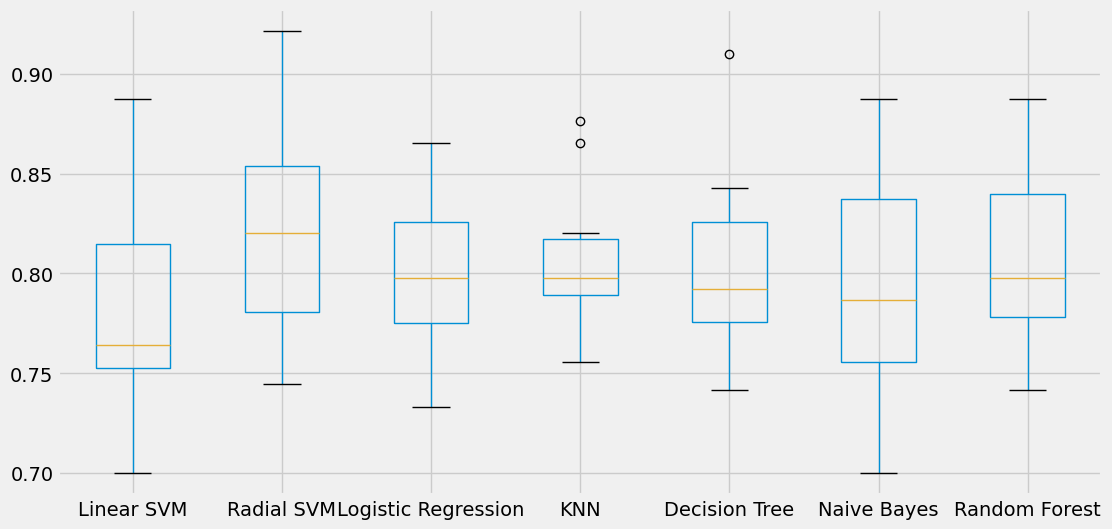

In [ ]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=classifiers)
box.T.boxplot()
plt.show()

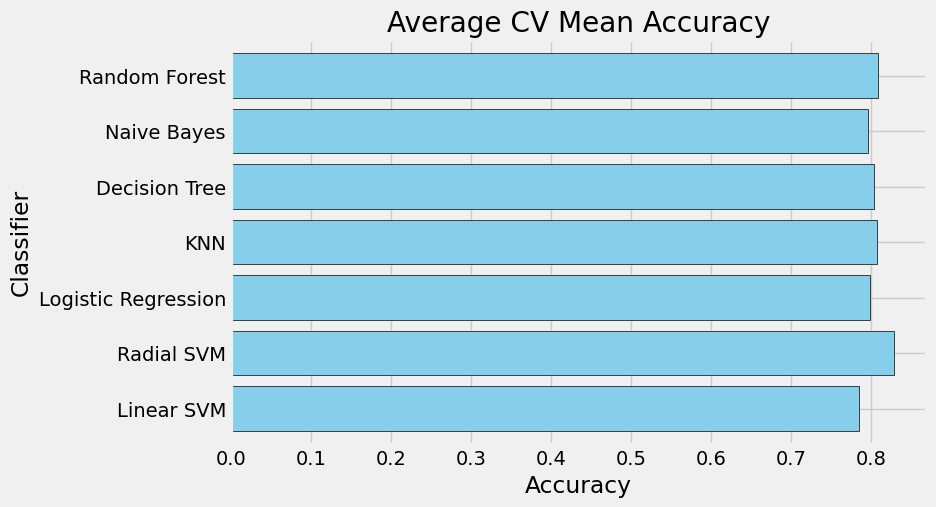

In [ ]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8, color='skyblue', edgecolor='black')
plt.title('Average CV Mean Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Classifier')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()


## **Confusion Matrix**

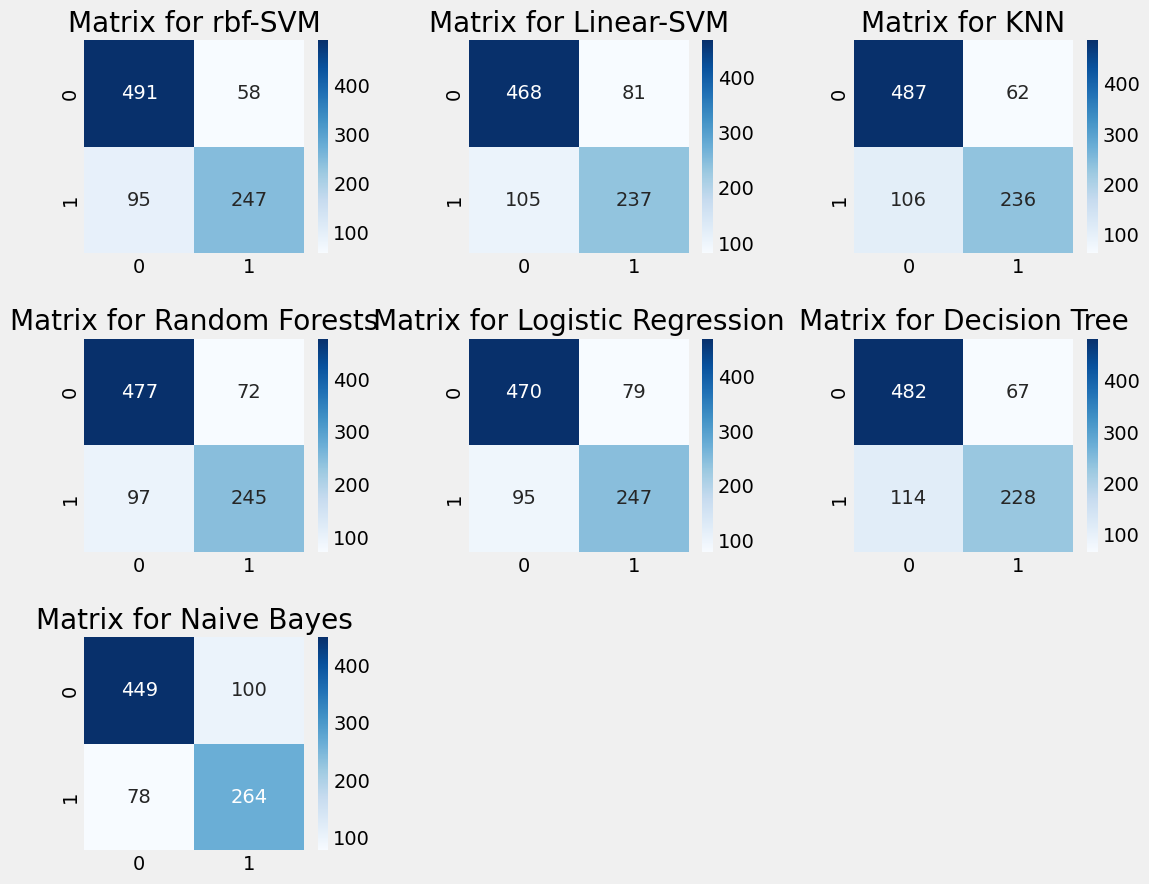

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(3, 3, figsize=(12, 10))

# rbf-SVM
y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,0], annot=True, fmt='d', cmap="Blues")
ax[0,0].set_title('Matrix for rbf-SVM')

# linear-SVM
y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,1], annot=True, fmt='d', cmap="Blues")
ax[0,1].set_title('Matrix for Linear-SVM')

# KNN
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,2], annot=True, fmt='d', cmap="Blues")
ax[0,2].set_title('Matrix for KNN')

# Random Forest
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,0], annot=True, fmt='d', cmap="Blues")
ax[1,0].set_title('Matrix for Random Forests')

# Logistic Regression
y_pred = cross_val_predict(LogisticRegression(max_iter=1000), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,1], annot=True, fmt='d', cmap="Blues")
ax[1,1].set_title('Matrix for Logistic Regression')

# Decision Tree
y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,2], annot=True, fmt='d', cmap="Blues")
ax[1,2].set_title('Matrix for Decision Tree')

# Naive Bayes
y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2,0], annot=True, fmt='d', cmap="Blues")
ax[2,0].set_title('Matrix for Naive Bayes')

# Hide unused subplots (optional)
ax[2,1].axis('off')
ax[2,2].axis('off')

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()


# **Hyper-Parameters Tuning: SVM**

In [ ]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

C = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']

hyper = {'kernel': kernel, 'C': C, 'gamma': gamma}

gd = GridSearchCV(
    estimator=svm.SVC(),
    param_grid=hyper,
    cv=10,            # ✅ 10-fold cross-validation
    verbose=2,        # more detailed output
    n_jobs=-1         # use all CPU cores
)

gd.fit(X, Y)

print("Best CV Score:", gd.best_score_)
print("Best Parameters:", gd.best_params_)
print("Best Estimator:", gd.best_estimator_)


Fitting 10 folds for each of 240 candidates, totalling 2400 fits
Best CV Score: 0.8282771535580524
Best Parameters: {'C': 0.6, 'gamma': 0.1, 'kernel': 'rbf'}
Best Estimator: SVC(C=0.6, gamma=0.1)


# **Hyper-Parameters Tuning: Random Forests**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
n_estimators = list(range(100, 1000, 100))
hyper = {'n_estimators': n_estimators}

# Grid search with cross-validation
gd = GridSearchCV(
    estimator=RandomForestClassifier(random_state=0),
    param_grid=hyper,
    cv=10,        # ✅ 10-fold cross-validation
    verbose=2,    # show progress
    n_jobs=-1     # use all CPU cores
)

gd.fit(X, Y)

print("Best CV Score:", gd.best_score_)
print("Best Parameters:", gd.best_params_)
print("Best Estimator:", gd.best_estimator_)


Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best CV Score: 0.8238701622971286
Best Parameters: {'n_estimators': 200}
Best Estimator: RandomForestClassifier(n_estimators=200, random_state=0)


# **Ensembling: Voting Classifier**

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ],
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8249188514357053


# **Ensembling: Bagging - Bagged KNN**

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Bagging KNN
model = BaggingClassifier(
    estimator=KNeighborsClassifier(n_neighbors=3),
    n_estimators=700,
    random_state=0,
    n_jobs=-1
)

# Fit model
model.fit(train_X, train_Y)

# Predictions and accuracy
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(test_Y, prediction))

# Cross-validated accuracy
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy', n_jobs=-1)
print('The cross-validated score for bagged KNN is:', result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross-validated score for bagged KNN is: 0.8104244694132333


**Bagged DecisionTree**

In [ ]:
# Bagging Decision Tree
model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=0,
    n_jobs=-1
)

# Fit model
model.fit(train_X, train_Y)

# Predictions and accuracy
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(test_Y, prediction))

# Cross-validated accuracy
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy', n_jobs=-1)
print('The cross-validated score for bagged Decision Tree is:', result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross-validated score for bagged Decision Tree is: 0.8171410736579275


# **Boosting - AdaBoost(Adaptive Boosting)**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8136828963795256


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


In [ ]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8182771535580524


In [ ]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.4, n_estimators=800)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X, Y)

print(model.estimator_)


DecisionTreeClassifier(max_depth=1)


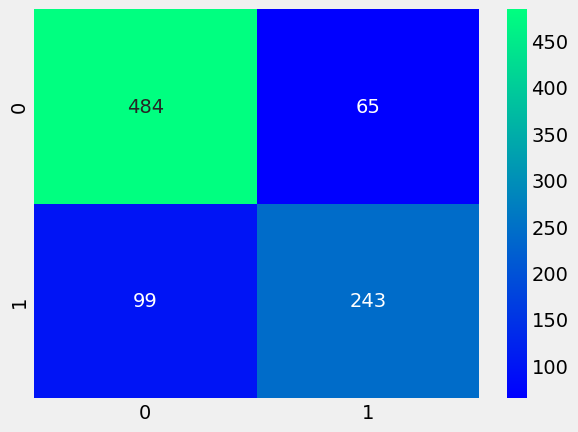

In [ ]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

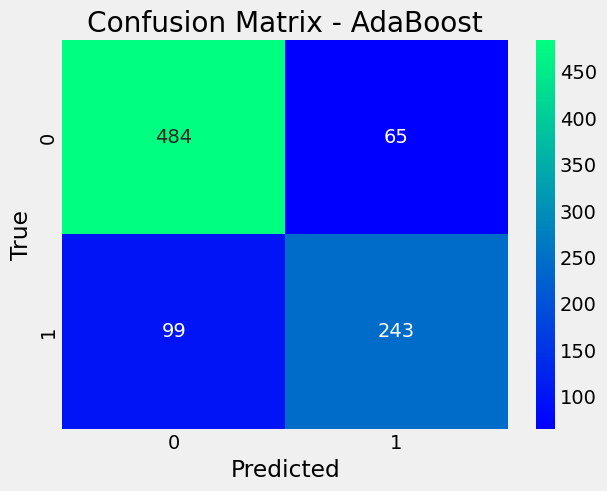

In [ ]:
# AdaBoost
ada = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)

# Cross-validated predictions
result = cross_val_predict(ada, X, Y, cv=10)

# Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='d')
plt.title("Confusion Matrix - AdaBoost")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

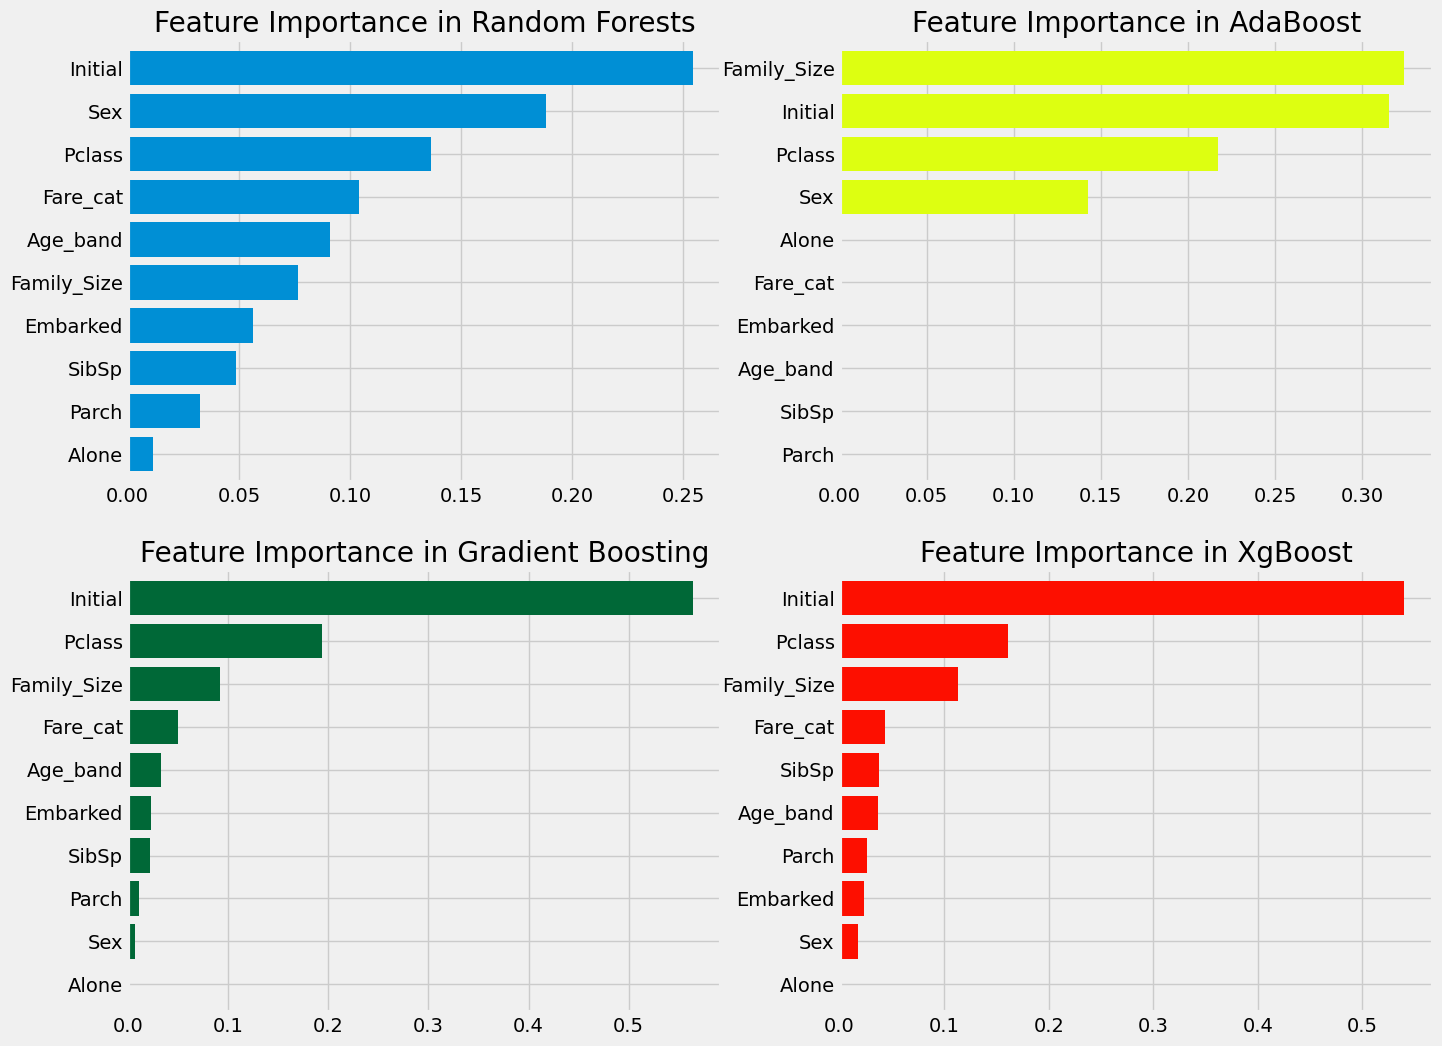

In [ ]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()